In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt" 
frozen_model = "frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] 
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


<dnn_Model 000001EBC4CFA2F0>

# Reading an image

In [8]:
image = cv2.imread('Capture3.JPG') 

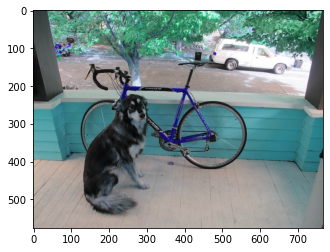

In [9]:
plt.imshow(image)

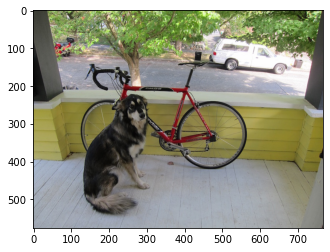

In [10]:
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece ,bbox = model.detect(image, confThreshold=0.5)


In [12]:
print(ClassIndex.flatten())

[ 2  3 18 17 15  8]


In [13]:
font_size = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(image,boxes, (255,0,0),2)
    cv2.putText(image,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_size, color=(0,255,0), thickness=3)

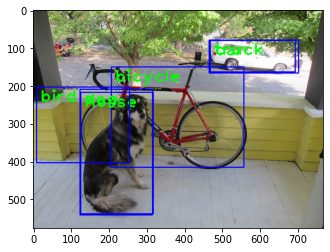

In [14]:
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

# Object detection from video

In [ ]:
cap = cv2.VideoCapture('videoplayback.mp4')

#checking if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture('videoplayback.mp4')
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_size = 3
font = cv2.FONT_HERSHEY_PLAIN

while  True:
    ret,frame = cap.read()
    
    ClassIndex, confidece ,bbox = model.detect(frame, confThreshold=0.5)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame,boxes, (255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_size, color=(0,255,0), thickness=3)

    cv2.imshow('object_detection',frame)
    
    if cv2.waitKey(2) &  255 == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
      



# Live Webcam detection

In [ ]:
cap = cv2.VideoCapture(0)

#checking if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_size = 3
font = cv2.FONT_HERSHEY_PLAIN

while  True:
    ret,frame = cap.read()
    
    ClassIndex, confidece ,bbox = model.detect(frame, confThreshold=0.5)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame,boxes, (255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_size, color=(0,255,0), thickness=3)

    cv2.imshow('object_detection',frame)
    
    if cv2.waitKey(2) &  255 == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
      

